# **DATA COLLECTION**

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [5]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/content/drive/MyDrive/IBM/Dataset/train_set",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')

test_dataset = test.flow_from_directory("/content/drive/MyDrive/IBM/Dataset/test_set",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [6]:
test_dataset.class_indices

{'Fire': 0, 'NoFire': 1}

# **MODEL BUILDING AND FITTING**

In [7]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

**COMPILE THE MODEL ✈**

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

**FIT THE MODEL ⚡**

In [9]:
r = model.fit(train_dataset,
         epochs = 10,
         validation_data = test_dataset)

Epoch 1/10
1/1 [==============================] - 12s 12s/step - loss: 0.6967 - accuracy: 0.5500 - val_loss: 0.5912 - val_accuracy: 0.6000
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 0.6388 - accuracy: 0.5500 - val_loss: 0.9704 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 0.9761 - accuracy: 0.5000 - val_loss: 0.6340 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 0.6478 - accuracy: 0.5000 - val_loss: 0.6171 - val_accuracy: 0.9500
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 0.6174 - accuracy: 0.8500 - val_loss: 0.6139 - val_accuracy: 0.7500
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 0.6048 - accuracy: 0.8000 - val_loss: 0.5628 - val_accuracy: 0.8500
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 0.5632 - accuracy: 0.8500 - val_loss: 0.4429 - val_accuracy: 1.0000
Epoch 8/10
1/1 [=======================

**LOSS VS ITERATION GRAPH ⤴**

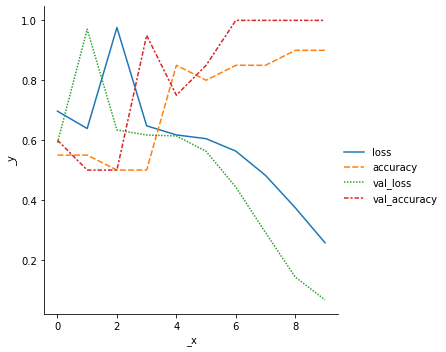

In [23]:
import seaborn as plt

plt.relplot(data=r.history, kind="line")

**ACCURACY/ITERATION ⤴**

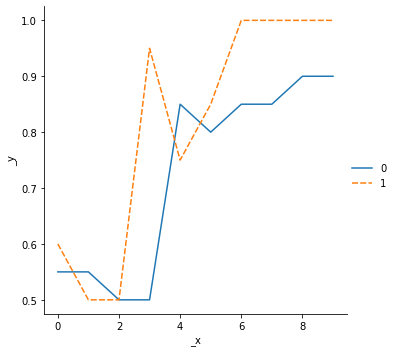

In [30]:
import seaborn as plt

plt.relplot(data=[r.history["accuracy"],r.history["val_accuracy"]], kind="line")

**FUNCTION - RETURNS IMAGE WITH LABEL 🌴**

In [110]:
import matplotlib.pyplot as plt
import random

def predictImage(filename, message = False):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 0:
      if message: sendMessage("Fire Detected")
      return plt.xlabel("Fire",fontsize=30)
    elif val == 1:
        return plt.xlabel("No Fire",fontsize=30)

In [88]:
def loadAndPredictImage(className):
  local_path = "/content/drive/MyDrive/IBM/Dataset/test_set/" + className + "/"
  files = []
  for filename in os.listdir(local_path):
      if filename.endswith("jpg"): 
          files.append(local_path+filename)

  ran = random.choice(files)
  predictImage(ran)

1/1 [==============================] - 0s 43ms/step
[[0.]]


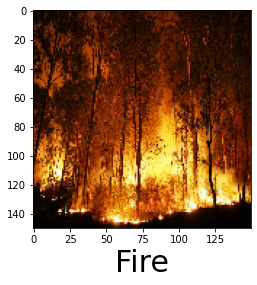

In [91]:
loadAndPredictImage("Fire")

# **VIDEO PROCESSING**

In [ ]:
from google.colab.patches import cv2_imshow

#define video from file
video=cv2.VideoCapture("/content/Pexels Videos 2330708.mp4") 
#define the features 
name=['forest','with fire']

while(1):
    success, frame= video.read() 
    cv2.imwrite("image.jpg",frame)
    img=image.load_img("image.jpg",target_size=(150,150)) 
    x=image.img_to_array(img) 
    x=np.expand_dims(x,axis=0)
    pred=model.predict(x) 
    print(pred[0])
    cv2.putText(frame,"predicted class="+str(name[int(pred[0])]),(100,100),cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,0), 1) 
    
    if pred[0]==1:
      # sendMessage("Forest Fire is detected, stay alert")
      print(message.sid)
      print('Fire Detected') 
      print('SMS sent!')
    else:
      print('No Danger') 
video.release() 
cv2.destryoAllWindows()